In [74]:
# Import statements

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [75]:
# inline matplotlib to show
%matplotlib inline

In [76]:
# Define ranges

RANGE = 25
CYTOPLASM_RANGE = 10

LUMEN_RED = 210 #105
LUMEN_GREEN = 110 #105
LUMEN_BLUE = 110 #205

CYTOPLASM_RED = 150 # 195.180.210
CYTOPLASM_GREEN = 150  #  (108, 140, 173);
CYTOPLASM_BLUE = 150 # (144, 147, 163);

NUCLEUS_RED = 100
NUCLEUS_GREEN = 100
NUCLEUS_BLUE = 130

LUMEN_LOW_RANGE = np.array([LUMEN_RED - RANGE, LUMEN_GREEN - RANGE, LUMEN_BLUE - RANGE], np.uint8)
LUMEN_HIGH_RANGE = np.array([LUMEN_RED + RANGE, LUMEN_GREEN + RANGE, LUMEN_BLUE + RANGE], np.uint8)

CYTOPLASM_LOW_RANGE = np.array([CYTOPLASM_RED - 25, CYTOPLASM_GREEN - 50, CYTOPLASM_BLUE - CYTOPLASM_RANGE])
CYTOPLASM_HIGH_RANGE = np.array([CYTOPLASM_RED + 25, CYTOPLASM_GREEN + 50, CYTOPLASM_BLUE + CYTOPLASM_RANGE])

NUCLEUS_LOW_RANGE = np.array([NUCLEUS_RED - 70, NUCLEUS_GREEN - 80, NUCLEUS_BLUE - 70])
NUCLEUS_HIGH_RANGE = np.array([NUCLEUS_RED + 70, NUCLEUS_GREEN + 80, NUCLEUS_BLUE + 60])

In [77]:
# Apply the masks

def apply_mask(imageYCC, image):
    cv.imshow("image1", imageYCC)
    imageYCC = cv.dilate(imageYCC, kernel = (5,5), iterations = 1)
    imageYCC = cv.dilate(imageYCC, kernel = (5,5), iterations = 1)
    cv.imshow("image", imageYCC)
    LUMEN_MASK = cv.inRange(imageYCC, LUMEN_LOW_RANGE, LUMEN_HIGH_RANGE)
    CYTOPLASM_MASK = cv.inRange(imageYCC, CYTOPLASM_LOW_RANGE, CYTOPLASM_HIGH_RANGE)
    NUCLEUS_MASK = cv.inRange(imageYCC, NUCLEUS_LOW_RANGE, NUCLEUS_HIGH_RANGE)

    LUMEN_MASK = LUMEN_MASK + NUCLEUS_MASK + CYTOPLASM_MASK

    result = cv.bitwise_and(imageYCC, imageYCC, mask=LUMEN_MASK)
    
    result = image.copy()
    result[LUMEN_MASK == 255] = [255,255,255]
    result[NUCLEUS_MASK == 255] = [255,255,255]
    result[CYTOPLASM_MASK == 255] = [255,105,180]

    # cv.imshow("result",np.hstack([imageYCC,image, result]))
    # cv.waitKey()
    # cv.destroyAllWindows()
    result = cv.cvtColor(result, cv.COLOR_YCR_CB2BGR)
    return result

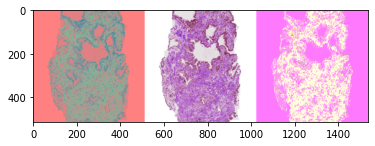

In [78]:
# driver code

image = cv.imread("images/0+0/03cbe5d39233a65cd7f64a81094ccc54_p_0.tiff", -1)
    
imageYCC = cv.cvtColor(image, cv.COLOR_BGR2YCR_CB)
result = apply_mask(imageYCC, image)
img = result.copy()
plt.imshow(np.hstack([imageYCC,image, result]))
plt.show()

In [79]:
############# Code for Gland Boundary here #################

In [80]:
image = cv.imread("images/0+0/03cbe5d39233a65cd7f64a81094ccc54_p_0.tiff", -1)

In [81]:
# Define ranges and thresholds

NUCLEUS_RED = 100
NUCLEUS_GREEN = 100
NUCLEUS_BLUE = 130

# NUCLEUS_THRESHOLD = [128,0,128]
NUCLEUS_THRESHOLD = [90,255,cv.THRESH_BINARY]

NUCLEUS_LOW_RANGE = np.array([NUCLEUS_RED - 70, NUCLEUS_GREEN - 80, NUCLEUS_BLUE - 70])
NUCLEUS_HIGH_RANGE = np.array([NUCLEUS_RED + 70, NUCLEUS_GREEN + 80, NUCLEUS_BLUE + 60])

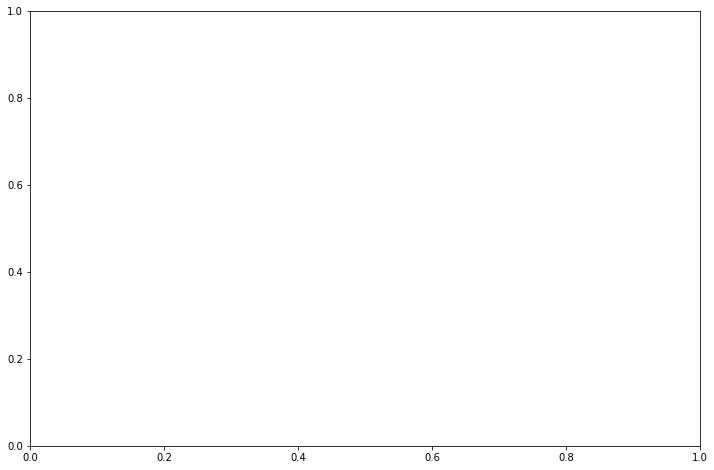

In [82]:
imageYCC = cv.cvtColor(image, cv.COLOR_BGR2YCR_CB)
gray = cv.cvtColor(image,cv.COLOR_RGB2GRAY)
edge = cv.Canny(gray, 60, 180)
fig, ax = plt.subplots(1, figsize=(12,8))

cnts 247
size elements total :  0
size of pic :  262144
rate of fullness : %  0.0


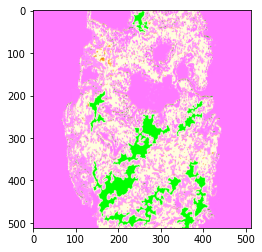

In [83]:
image = apply_mask(imageYCC, image)
# cv.imshow('once', result)

dimensions = image.shape

height= image.shape[0]
width = image.shape[1]
size = height*width

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (7, 7), 0)
cv.imshow("gray", gray)

_,thresh = cv.threshold(gray,240,255,cv.THRESH_BINARY)

cnts, hier = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
size_elements = 0
print("cnts", len(cnts))
cnts.pop()
cnts = [c for c in cnts if (cv.contourArea(c) > 500.0 and cv.contourArea(c) < 7000.0) ]
cv.drawContours(image,cnts, -1, (0, 255, 0), thickness=cv.FILLED)

plt.imshow(image)
print("size elements total : ", size_elements)
print("size of pic : ", size)
print("rate of fullness : % ", (size_elements/size)*100)
plt.show()

211.0


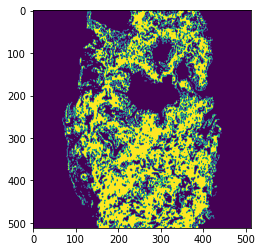

In [84]:
# Conversion
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, th = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(ret)
plt.imshow(th)
plt.show()

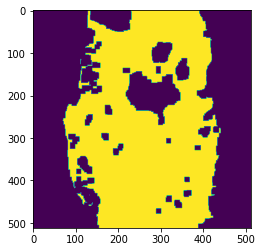

In [85]:
# Apply dilations and erosions

kernel = np.ones((3,3), dtype = np.uint8)
# dilated_th = cv.dilate(th, kernel, iterations=1)
dilated_th1 = cv.dilate(th, kernel, iterations = 4)
# eroded_th = cv.erode(dilated_th1, kernel, iterations=2)
eroded_th = cv.erode(dilated_th1, kernel, iterations=5)
plt.imshow(eroded_th)
plt.show()

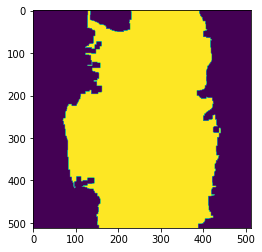

In [86]:
# Further processing

contours, _ = cv.findContours(eroded_th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)[-2:]
contours = sorted(contours, key=cv.contourArea, reverse=True)
contour = contours[0]

mask_img = np.zeros(eroded_th.shape, dtype = np.uint8)
cv.drawContours(mask_img, contours, 0, 255, -1)

plt.imshow(mask_img)
plt.show()

In [87]:
# Finding contours using Tree
# contours, _ = cv.findContours(eroded_th, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)[-2:]
# contours = sorted(contours, )

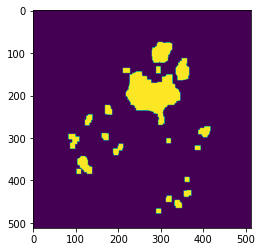

In [88]:
new_eroded = cv.bitwise_not(eroded_th)
cnts = cv.bitwise_and(new_eroded, mask_img)
plt.imshow(cnts)
plt.show()

In [89]:
# Finding contours
contours, _ = cv.findContours(cnts, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)[-2:]
contours = sorted(contours, key=cv.contourArea, reverse=True)
contours = contours[0:3]

bbs = [cv.boundingRect(c) for c in contours]
bbs_new = np.asarray([[bb[0], bb[1], bb[2] + bb[0] - 1, bb[3] + bb[1] - 1] for bb in bbs])
x1 = min(bbs_new[:, [0]].flatten())
y1 = min(bbs_new[:, [1]].flatten()) 
x2 = max(bbs_new[:, [2]].flatten())
y2 = max(bbs_new[:, [3]].flatten())

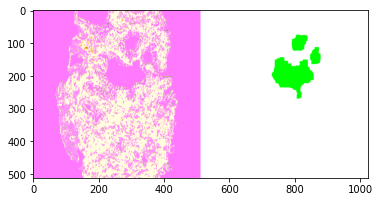

In [90]:
# Adding a new image to draw contours
new_img = np.ones((cnts.shape[0], cnts.shape[1], 3), dtype=np.uint8) * 255
cv.drawContours(new_img, contours, -1, (0, 255, 0), -1)
# new_img = new_img[y1:y2 + 1, x1: x2 + 1]
# img[new_img == 255] = (0, 255, 0)
# img[new_img != 255] = (255, 255, 255)
plt.imshow(np.hstack([img, new_img]))
plt.show()

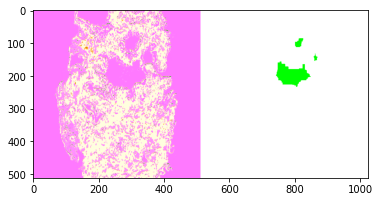

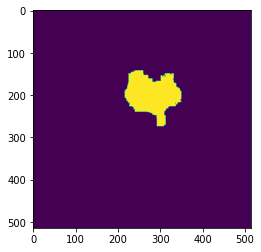

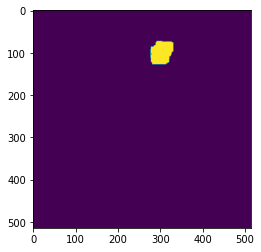

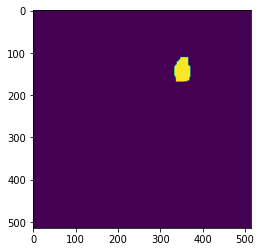

In [109]:
masks = []

for c in contours:
    M = cv.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    h,w = th.shape[:2]
    mask1 = np.zeros((h + 2, w + 2), dtype = np.uint8)
    cv.floodFill(th, mask1, (cX,cY), 255)
    
    cmask = np.zeros((h, w), dtype = np.uint8)
    cv.drawContours(cmask, [c], -1, 255, -1)
    cmask = cv.dilate(cmask, kernel, iterations = 3)
    cmask2 = cv.copyMakeBorder(cmask, 1, 1, 1, 1, cv.BORDER_CONSTANT, value = 0)
    cmask3 = cv.bitwise_and(cmask2, mask1)
    masks.append(cmask3.copy())
    plt.imshow(cmask3)
    plt.show()


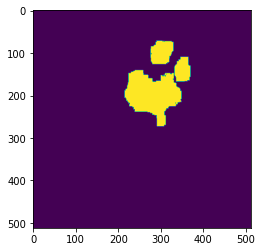

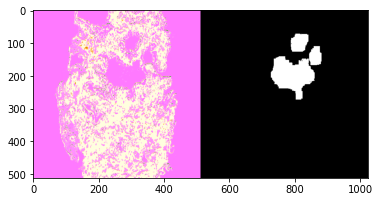

In [124]:
# Bitwise or
nimg = cv.bitwise_or(masks[0], cv.bitwise_or(masks[1], masks[2]))
nimg = nimg[1:-1, 1:-1] * 255
plt.imshow(nimg)
plt.show()
nimg = cv.cvtColor(nimg, cv.COLOR_GRAY2BGR)
plt.imshow(np.hstack([img, nimg]))
plt.show()